# Image Data Augmentation on Fashion-MNIST

## Load and check the data using the data.py file

In [10]:
import sys
sys.path.append("..")

from src.data import load_data

(x_train, y_train), (x_val, y_val), (x_test, y_test) = load_data()

print("Train:", x_train.shape)
print("Val:", x_val.shape)
print("Test:", x_test.shape)
print("Range:", x_train.min(), x_train.max())

Train: (54000, 28, 28, 1)
Val: (6000, 28, 28, 1)
Test: (10000, 28, 28, 1)
Range: 0.0 1.0


#### Visual Sanity Check

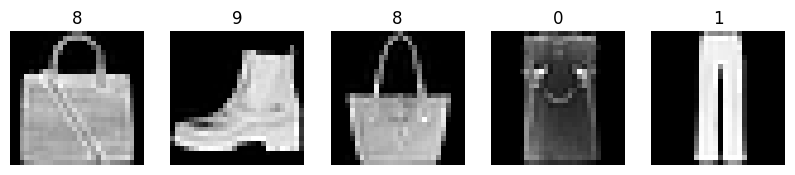

In [11]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, figsize=(10, 2))

for i, ax in enumerate(axes):
    ax.imshow(x_train[i].squeeze(), cmap="gray")
    ax.set_title(str(y_train[i]))
    ax.axis("off")

plt.show()


## Data Augmentation

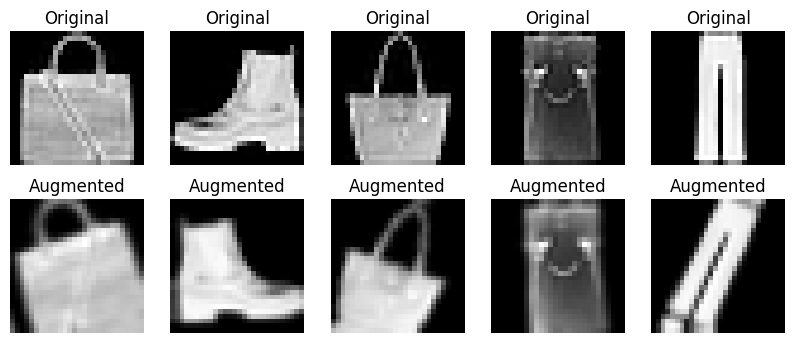

In [12]:
from src.augment import build_augmentation
import matplotlib.pyplot as plt

augmentation = build_augmentation()

sample_images = x_train[:5]

augmented_images = augmentation(sample_images, training=True)

fig, axes = plt.subplots(2, 5, figsize=(10, 4))

for i in range(5):
    axes[0, i].imshow(sample_images[i].squeeze(), cmap="gray")
    axes[0, i].set_title("Original")
    axes[0, i].axis("off")

    axes[1, i].imshow(augmented_images[i].numpy().squeeze(), cmap="gray")
    axes[1, i].set_title("Augmented")
    axes[1, i].axis("off")

plt.show()

## Training the CNN model

In [13]:
from src.model import (
    create_cnn_model,
    create_cnn_model_with_augmentation,
    compile_model,
    get_callbacks,
    get_callbacks_augmented
)

### Load and sanity check

In [14]:
(x_train, y_train), (x_val, y_val), (x_test, y_test) = load_data()

print("Train:", x_train.shape)
print("Val:", x_val.shape)
print("Test:", x_test.shape)
print("Range:", x_train.min(), x_train.max())

Train: (54000, 28, 28, 1)
Val: (6000, 28, 28, 1)
Test: (10000, 28, 28, 1)
Range: 0.0 1.0


### Baseline Model (No augmentation)

In [15]:
baseline_model = create_cnn_model(input_shape=x_train.shape[1:])
baseline_model = compile_model(baseline_model)

baseline_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1 (BatchNormalization)        │ (None, 28, 28, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2 (BatchNormalization)        │ (None, 14, 14, 64)     │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3 (BatchNormalization)        │ (None, 7, 7, 128)      │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling2D)            │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout1 (Dropout)              │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout2 (Dropout)              │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 250,058 (976.79 KB)

 Trainable params: 249,610 (975.04 KB)

 Non-trainable params: 448 (1.75 KB)

In [16]:
#Train baseline model

history_baseline = baseline_model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=50,
    batch_size=128,
    callbacks=get_callbacks(patience=10),
    verbose=1
)


Epoch 1/50
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6538 - loss: 1.0358
Epoch 1: val_loss improved from None to 1.12275, saving model to models/best_model.h5


422/422 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.7529 - loss: 0.7170 - val_accuracy: 0.6267 - val_loss: 1.1228 - learning_rate: 0.0010
Epoch 2/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8532 - loss: 0.4295
Epoch 2: val_loss improved from 1.12275 to 0.27800, saving model to models/best_model.h5


422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.8600 - loss: 0.4113 - val_accuracy: 0.8947 - val_loss: 0.2780 - learning_rate: 0.0010
Epoch 3/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8794 - loss: 0.3578
Epoch 3: val_loss improved from 0.27800 to 0.24707, saving model to models/best_model.h5


422/422 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 0.8838 - loss: 0.3439 - val_accuracy: 0.9120 - val_loss: 0.2471 - learning_rate: 0.0010
Epoch 4/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8960 - loss: 0.3044
Epoch 4: val_loss improved from 0.24707 to 0.24635, saving model to models/best_model.h5


422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - accuracy: 0.8971 - loss: 0.3029 - val_accuracy: 0.9103 - val_loss: 0.2464 - learning_rate: 0.0010
Epoch 5/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9037 - loss: 0.2882
Epoch 5: val_loss improved from 0.24635 to 0.24281, saving model to models/best_model.h5


422/422 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 0.9050 - loss: 0.2798 - val_accuracy: 0.9070 - val_loss: 0.2428 - learning_rate: 0.0010
Epoch 6/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9134 - loss: 0.2513
Epoch 6: val_loss did not improve from 0.24281
422/422 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 0.9106 - loss: 0.2588 - val_accuracy: 0.9120 - val_loss: 0.2429 - learning_rate: 0.0010
Epoch 7/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9179 - loss: 0.2302
Epoch 7: val_loss improved from 0.24281 to 0.22192, saving model to models/best_model.h5


422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - accuracy: 0.9173 - loss: 0.2327 - val_accuracy: 0.9162 - val_loss: 0.2219 - learning_rate: 0.0010
Epoch 8/50
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9256 - loss: 0.2157
Epoch 8: val_loss did not improve from 0.22192
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 43ms/step - accuracy: 0.9254 - loss: 0.2194 - val_accuracy: 0.9040 - val_loss: 0.2672 - learning_rate: 0.0010
Epoch 9/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9305 - loss: 0.1989
Epoch 9: val_loss did not improve from 0.22192
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 43ms/step - accuracy: 0.9293 - loss: 0.2025 - val_accuracy: 0.9193 - val_loss: 0.2222 - learning_rate: 0.0010
Epoch 10/50
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9337 - loss: 0.1912
Epoch 10: val_loss improved from 0.22192 to 0.21305, saving model to models/best_model.h5


422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 43ms/step - accuracy: 0.9329 - loss: 0.1933 - val_accuracy: 0.9263 - val_loss: 0.2131 - learning_rate: 0.0010
Epoch 11/50
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9375 - loss: 0.1831
Epoch 11: val_loss did not improve from 0.21305
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.9365 - loss: 0.1838 - val_accuracy: 0.9238 - val_loss: 0.2217 - learning_rate: 0.0010
Epoch 12/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9430 - loss: 0.1614
Epoch 12: val_loss improved from 0.21305 to 0.20131, saving model to models/best_model.h5


422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 43ms/step - accuracy: 0.9404 - loss: 0.1696 - val_accuracy: 0.9295 - val_loss: 0.2013 - learning_rate: 0.0010
Epoch 13/50
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9450 - loss: 0.1587
Epoch 13: val_loss did not improve from 0.20131
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.9439 - loss: 0.1615 - val_accuracy: 0.9297 - val_loss: 0.2039 - learning_rate: 0.0010
Epoch 14/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9507 - loss: 0.1457
Epoch 14: val_loss did not improve from 0.20131
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.9480 - loss: 0.1511 - val_accuracy: 0.9270 - val_loss: 0.2177 - learning_rate: 0.0010
Epoch 15/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9471 - loss: 0.1469
Epoch 15: val_loss did not improve from 0.20131
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.9471 - loss: 0.1481 - val_accuracy: 0.9127 - val_loss: 0.2354 - learning_rate: 0.0010
Epoch 16/50
421/422 

In [17]:
baseline_train_acc = history_baseline.history["accuracy"][-1]
baseline_val_acc = history_baseline.history["val_accuracy"][-1]

print(f"Baseline train accuracy: {baseline_train_acc:.4f}")
print(f"Baseline val accuracy:   {baseline_val_acc:.4f}")


Baseline train accuracy: 0.9777
Baseline val accuracy:   0.9293


### Augmented model

In [18]:
aug_model = create_cnn_model_with_augmentation(
    input_shape=x_train.shape[1:]
)
aug_model = compile_model(aug_model)

aug_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1 (BatchNormalization)        │ (None, 28, 28, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2 (BatchNormalization)        │ (None, 14, 14, 64)     │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3 (BatchNormalization)        │ (None, 7, 7, 128)      │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling2D)            │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout1 (Dropout)              │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout2 (Dropout)              │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 250,058 (976.79 KB)

 Trainable params: 249,610 (975.04 KB)

 Non-trainable params: 448 (1.75 KB)

In [19]:
# Train augmented model

history_aug = aug_model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=50,
    batch_size=128,
    callbacks=get_callbacks_augmented(patience=15),
    verbose=1
)

Epoch 1/50
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5397 - loss: 1.3344
Epoch 1: val_loss improved from None to 1.51041, saving model to models/best_model_augmented.h5


422/422 ━━━━━━━━━━━━━━━━━━━━ 25s 56ms/step - accuracy: 0.6424 - loss: 0.9894 - val_accuracy: 0.4485 - val_loss: 1.5104 - learning_rate: 0.0010
Epoch 2/50
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.7383 - loss: 0.7016
Epoch 2: val_loss improved from 1.51041 to 0.49625, saving model to models/best_model_augmented.h5


422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 55ms/step - accuracy: 0.7509 - loss: 0.6698 - val_accuracy: 0.8293 - val_loss: 0.4962 - learning_rate: 0.0010
Epoch 3/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.7781 - loss: 0.6028
Epoch 3: val_loss improved from 0.49625 to 0.47349, saving model to models/best_model_augmented.h5


422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 55ms/step - accuracy: 0.7859 - loss: 0.5835 - val_accuracy: 0.8270 - val_loss: 0.4735 - learning_rate: 0.0010
Epoch 4/50
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8049 - loss: 0.5429
Epoch 4: val_loss did not improve from 0.47349
422/422 ━━━━━━━━━━━━━━━━━━━━ 22s 52ms/step - accuracy: 0.8114 - loss: 0.5283 - val_accuracy: 0.8340 - val_loss: 0.4953 - learning_rate: 0.0010
Epoch 5/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8233 - loss: 0.4924
Epoch 5: val_loss did not improve from 0.47349
422/422 ━━━━━━━━━━━━━━━━━━━━ 22s 53ms/step - accuracy: 0.8239 - loss: 0.4929 - val_accuracy: 0.8092 - val_loss: 0.5101 - learning_rate: 0.0010
Epoch 6/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8366 - loss: 0.4648
Epoch 6: val_loss improved from 0.47349 to 0.44929, saving model to models/best_model_augmented.h5


422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 53ms/step - accuracy: 0.8376 - loss: 0.4582 - val_accuracy: 0.8323 - val_loss: 0.4493 - learning_rate: 0.0010
Epoch 7/50
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8428 - loss: 0.4457
Epoch 7: val_loss improved from 0.44929 to 0.36182, saving model to models/best_model_augmented.h5


422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 53ms/step - accuracy: 0.8447 - loss: 0.4397 - val_accuracy: 0.8725 - val_loss: 0.3618 - learning_rate: 0.0010
Epoch 8/50
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8472 - loss: 0.4259
Epoch 8: val_loss improved from 0.36182 to 0.35127, saving model to models/best_model_augmented.h5


422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 55ms/step - accuracy: 0.8482 - loss: 0.4248 - val_accuracy: 0.8713 - val_loss: 0.3513 - learning_rate: 0.0010
Epoch 9/50
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8534 - loss: 0.4134
Epoch 9: val_loss did not improve from 0.35127
422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 54ms/step - accuracy: 0.8532 - loss: 0.4138 - val_accuracy: 0.8645 - val_loss: 0.3974 - learning_rate: 0.0010
Epoch 10/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8606 - loss: 0.3948
Epoch 10: val_loss improved from 0.35127 to 0.34008, saving model to models/best_model_augmented.h5


422/422 ━━━━━━━━━━━━━━━━━━━━ 24s 57ms/step - accuracy: 0.8590 - loss: 0.3991 - val_accuracy: 0.8805 - val_loss: 0.3401 - learning_rate: 0.0010
Epoch 11/50
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8623 - loss: 0.3912
Epoch 11: val_loss improved from 0.34008 to 0.31670, saving model to models/best_model_augmented.h5


422/422 ━━━━━━━━━━━━━━━━━━━━ 24s 57ms/step - accuracy: 0.8615 - loss: 0.3946 - val_accuracy: 0.8883 - val_loss: 0.3167 - learning_rate: 0.0010
Epoch 12/50
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8627 - loss: 0.3867
Epoch 12: val_loss improved from 0.31670 to 0.31383, saving model to models/best_model_augmented.h5


422/422 ━━━━━━━━━━━━━━━━━━━━ 25s 58ms/step - accuracy: 0.8628 - loss: 0.3879 - val_accuracy: 0.8875 - val_loss: 0.3138 - learning_rate: 0.0010
Epoch 13/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8654 - loss: 0.3748
Epoch 13: val_loss did not improve from 0.31383
422/422 ━━━━━━━━━━━━━━━━━━━━ 25s 58ms/step - accuracy: 0.8663 - loss: 0.3759 - val_accuracy: 0.8698 - val_loss: 0.3611 - learning_rate: 0.0010
Epoch 14/50
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8685 - loss: 0.3581
Epoch 14: val_loss did not improve from 0.31383
422/422 ━━━━━━━━━━━━━━━━━━━━ 24s 56ms/step - accuracy: 0.8684 - loss: 0.3622 - val_accuracy: 0.8798 - val_loss: 0.3291 - learning_rate: 0.0010
Epoch 15/50
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8729 - loss: 0.3560
Epoch 15: val_loss did not improve from 0.31383
422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 55ms/step - accuracy: 0.8702 - loss: 0.3641 - val_accuracy: 0.8882 - val_loss: 0.3153 - learning_rate: 0.0010
Epoch 16/50
422/422 

422/422 ━━━━━━━━━━━━━━━━━━━━ 22s 53ms/step - accuracy: 0.8764 - loss: 0.3455 - val_accuracy: 0.8890 - val_loss: 0.3103 - learning_rate: 0.0010
Epoch 20/50
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8789 - loss: 0.3402
Epoch 20: val_loss improved from 0.31026 to 0.30688, saving model to models/best_model_augmented.h5


422/422 ━━━━━━━━━━━━━━━━━━━━ 22s 53ms/step - accuracy: 0.8801 - loss: 0.3391 - val_accuracy: 0.8892 - val_loss: 0.3069 - learning_rate: 0.0010
Epoch 21/50
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.8812 - loss: 0.3352
Epoch 21: val_loss improved from 0.30688 to 0.28984, saving model to models/best_model_augmented.h5


422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 56ms/step - accuracy: 0.8788 - loss: 0.3378 - val_accuracy: 0.8933 - val_loss: 0.2898 - learning_rate: 0.0010
Epoch 22/50
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.8813 - loss: 0.3298
Epoch 22: val_loss did not improve from 0.28984
422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 56ms/step - accuracy: 0.8822 - loss: 0.3326 - val_accuracy: 0.8823 - val_loss: 0.3124 - learning_rate: 0.0010
Epoch 23/50
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8859 - loss: 0.3199
Epoch 23: val_loss did not improve from 0.28984
422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 54ms/step - accuracy: 0.8851 - loss: 0.3239 - val_accuracy: 0.8923 - val_loss: 0.3031 - learning_rate: 0.0010
Epoch 24/50
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.8834 - loss: 0.3258
Epoch 24: val_loss improved from 0.28984 to 0.27772, saving model to models/best_model_augmented.h5


422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 55ms/step - accuracy: 0.8857 - loss: 0.3228 - val_accuracy: 0.9032 - val_loss: 0.2777 - learning_rate: 0.0010
Epoch 25/50
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8828 - loss: 0.3273
Epoch 25: val_loss did not improve from 0.27772
422/422 ━━━━━━━━━━━━━━━━━━━━ 24s 56ms/step - accuracy: 0.8851 - loss: 0.3235 - val_accuracy: 0.8825 - val_loss: 0.2993 - learning_rate: 0.0010
Epoch 26/50
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8902 - loss: 0.3150
Epoch 26: val_loss did not improve from 0.27772
422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 55ms/step - accuracy: 0.8877 - loss: 0.3173 - val_accuracy: 0.8807 - val_loss: 0.3245 - learning_rate: 0.0010
Epoch 27/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8884 - loss: 0.3190
Epoch 27: val_loss did not improve from 0.27772
422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 54ms/step - accuracy: 0.8882 - loss: 0.3176 - val_accuracy: 0.8523 - val_loss: 0.3931 - learning_rate: 0.0010
Epoch 28/50
421/422 

422/422 ━━━━━━━━━━━━━━━━━━━━ 26s 61ms/step - accuracy: 0.8921 - loss: 0.3081 - val_accuracy: 0.9077 - val_loss: 0.2696 - learning_rate: 0.0010
Epoch 32/50
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.8942 - loss: 0.3022
Epoch 32: val_loss improved from 0.26959 to 0.26263, saving model to models/best_model_augmented.h5


422/422 ━━━━━━━━━━━━━━━━━━━━ 25s 59ms/step - accuracy: 0.8926 - loss: 0.3039 - val_accuracy: 0.9050 - val_loss: 0.2626 - learning_rate: 0.0010
Epoch 33/50
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8919 - loss: 0.3018
Epoch 33: val_loss did not improve from 0.26263
422/422 ━━━━━━━━━━━━━━━━━━━━ 24s 56ms/step - accuracy: 0.8914 - loss: 0.3043 - val_accuracy: 0.9008 - val_loss: 0.2853 - learning_rate: 0.0010
Epoch 34/50
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.8931 - loss: 0.2953
Epoch 34: val_loss did not improve from 0.26263
422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 55ms/step - accuracy: 0.8937 - loss: 0.2964 - val_accuracy: 0.9042 - val_loss: 0.2705 - learning_rate: 0.0010
Epoch 35/50
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8936 - loss: 0.2962
Epoch 35: val_loss improved from 0.26263 to 0.26209, saving model to models/best_model_augmented.h5


422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 55ms/step - accuracy: 0.8943 - loss: 0.2976 - val_accuracy: 0.9047 - val_loss: 0.2621 - learning_rate: 0.0010
Epoch 36/50
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.8948 - loss: 0.2971
Epoch 36: val_loss did not improve from 0.26209
422/422 ━━━━━━━━━━━━━━━━━━━━ 24s 56ms/step - accuracy: 0.8920 - loss: 0.3032 - val_accuracy: 0.8945 - val_loss: 0.2915 - learning_rate: 0.0010
Epoch 37/50
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.8954 - loss: 0.2998
Epoch 37: val_loss did not improve from 0.26209
422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 55ms/step - accuracy: 0.8939 - loss: 0.3010 - val_accuracy: 0.9042 - val_loss: 0.2678 - learning_rate: 0.0010
Epoch 38/50
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8939 - loss: 0.3024
Epoch 38: val_loss did not improve from 0.26209
422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 54ms/step - accuracy: 0.8940 - loss: 0.2985 - val_accuracy: 0.8888 - val_loss: 0.3087 - learning_rate: 0.0010
Epoch 39/50
422/422 

422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 54ms/step - accuracy: 0.9029 - loss: 0.2749 - val_accuracy: 0.9128 - val_loss: 0.2496 - learning_rate: 5.0000e-04
Epoch 44/50
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9038 - loss: 0.2684
Epoch 44: val_loss did not improve from 0.24961
422/422 ━━━━━━━━━━━━━━━━━━━━ 24s 56ms/step - accuracy: 0.9049 - loss: 0.2686 - val_accuracy: 0.9028 - val_loss: 0.2727 - learning_rate: 5.0000e-04
Epoch 45/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9064 - loss: 0.2651
Epoch 45: val_loss did not improve from 0.24961
422/422 ━━━━━━━━━━━━━━━━━━━━ 22s 53ms/step - accuracy: 0.9078 - loss: 0.2608 - val_accuracy: 0.9068 - val_loss: 0.2543 - learning_rate: 5.0000e-04
Epoch 46/50
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9050 - loss: 0.2640
Epoch 46: val_loss did not improve from 0.24961
422/422 ━━━━━━━━━━━━━━━━━━━━ 22s 53ms/step - accuracy: 0.9062 - loss: 0.2611 - val_accuracy: 0.9098 - val_loss: 0.2502 - learning_rate: 5.0000e-04
Epoc

422/422 ━━━━━━━━━━━━━━━━━━━━ 22s 53ms/step - accuracy: 0.9088 - loss: 0.2565 - val_accuracy: 0.9132 - val_loss: 0.2407 - learning_rate: 5.0000e-04
Epoch 48/50
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9077 - loss: 0.2510
Epoch 48: val_loss did not improve from 0.24073
422/422 ━━━━━━━━━━━━━━━━━━━━ 22s 52ms/step - accuracy: 0.9061 - loss: 0.2574 - val_accuracy: 0.9128 - val_loss: 0.2426 - learning_rate: 5.0000e-04
Epoch 49/50
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9104 - loss: 0.2546
Epoch 49: val_loss did not improve from 0.24073
422/422 ━━━━━━━━━━━━━━━━━━━━ 22s 51ms/step - accuracy: 0.9093 - loss: 0.2574 - val_accuracy: 0.9133 - val_loss: 0.2429 - learning_rate: 5.0000e-04
Epoch 50/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9112 - loss: 0.2498
Epoch 50: val_loss improved from 0.24073 to 0.23704, saving model to models/best_model_augmented.h5


422/422 ━━━━━━━━━━━━━━━━━━━━ 22s 52ms/step - accuracy: 0.9086 - loss: 0.2562 - val_accuracy: 0.9142 - val_loss: 0.2370 - learning_rate: 5.0000e-04
Restoring model weights from the end of the best epoch: 50.


In [20]:
aug_train_acc = history_aug.history["accuracy"][-1]
aug_val_acc = history_aug.history["val_accuracy"][-1]

print(f"Augmented train accuracy: {aug_train_acc:.4f}")
print(f"Augmented val accuracy:   {aug_val_acc:.4f}")


Augmented train accuracy: 0.9086
Augmented val accuracy:   0.9142


### Compaison

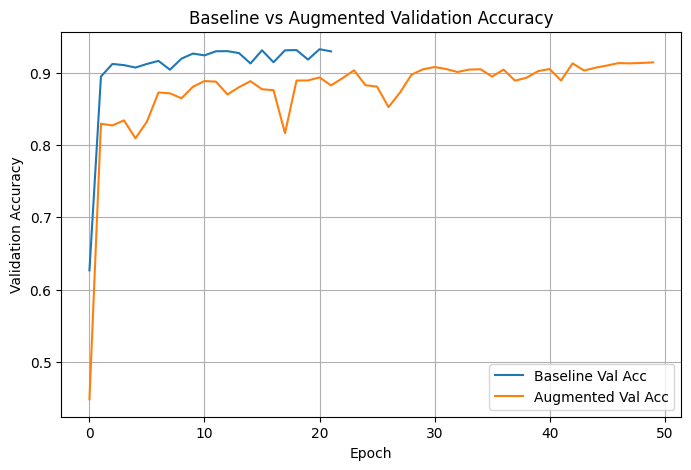

In [21]:
plt.figure(figsize=(8, 5))

plt.plot(history_baseline.history["val_accuracy"], label="Baseline Val Acc")
plt.plot(history_aug.history["val_accuracy"], label="Augmented Val Acc")

plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("Baseline vs Augmented Validation Accuracy")
plt.legend()
plt.grid(True)

plt.savefig("../figures/accuracy_curves.png")
plt.show()


## Evaluation

In [22]:
from train_eval import evaluate_model

### Load test data 

In [23]:
(_, _), (_, _), (x_test, y_test) = load_data()

print("Test shape:", x_test.shape)

Test shape: (10000, 28, 28, 1)


### Evaluate Baseline Model


Evaluating CNN Without Augmentation
Test Accuracy: 0.9219
Test Loss: 0.2403
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1000
           1       0.99      0.99      0.99      1000
           2       0.84      0.90      0.87      1000
           3       0.90      0.95      0.92      1000
           4       0.87      0.87      0.87      1000
           5       0.99      0.97      0.98      1000
           6       0.81      0.73      0.77      1000
           7       0.96      0.98      0.97      1000
           8       0.99      0.98      0.99      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



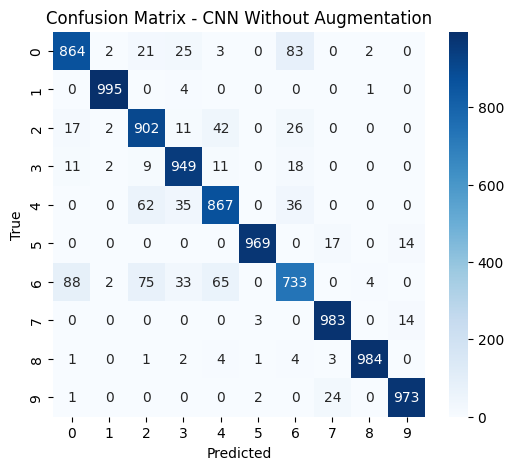

In [29]:
acc_no_aug = evaluate_model(
    "models/best_model.h5",
    x_test,
    y_test,
    "CNN Without Augmentation"
)


### Evaluate augmented model


Evaluating CNN With Augmentation
Test Accuracy: 0.9044
Test Loss: 0.2609
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.83      0.89      0.86      1000
           3       0.90      0.90      0.90      1000
           4       0.87      0.83      0.85      1000
           5       0.97      0.98      0.98      1000
           6       0.77      0.68      0.72      1000
           7       0.93      0.97      0.95      1000
           8       0.97      0.99      0.98      1000
           9       0.98      0.93      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



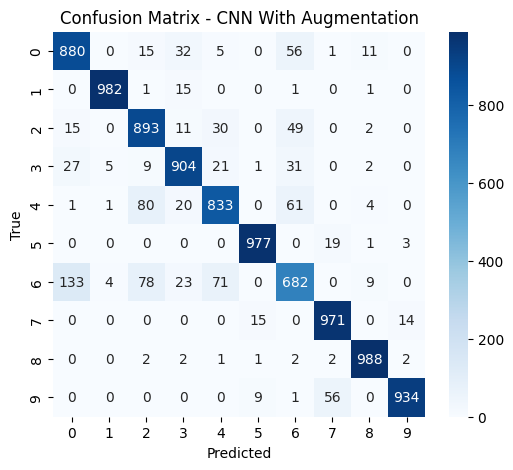

In [30]:
acc_aug = evaluate_model(
    "models/best_model_augmented.h5",
    x_test,
    y_test,
    "CNN With Augmentation"
)

### Final Comaprison

In [31]:
print("\nFinal Comparison")
print("=" * 50)
print(f"Accuracy without augmentation: {acc_no_aug:.4f}")
print(f"Accuracy with augmentation:    {acc_aug:.4f}")

if acc_aug > acc_no_aug:
    print("Data augmentation improves generalization.")
else:
    print("Baseline model performs better on this dataset.")


Final Comparison
Accuracy without augmentation: 0.9219
Accuracy with augmentation:    0.9044
Baseline model performs better on this dataset.
